# Cargar librerías y leer la "DATA" resumen
Existen 2 archivos csv que van a ser graficados.
1. Un resumen del total de fallecidos y vacunados por COVID-19 en el Perú, llamado **"epi_weeks.csv"**.
2. Y un resumen de fallecidos y tasa de mortalidad por departamentos del Perú llamado **"TOTAL_fallecidosXciudades.csv"**. Ambos en la carpeta **Data**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style

# Summary 1
epi_df = pd.read_csv("Data/epi_weeks.csv")

# Add a new col of percentages of each row from any variable
def colPercent(dataset, new_name, col_name):
    dataset[new_name] = (dataset[col_name] / dataset[col_name].sum()) * 100

# Add the total percetange of deceaced and vaccinated to our data
colPercent(epi_df, "deceased_%", "deceased")
colPercent(epi_df, "vaccinated_%", "vaccinated")

print("Epidemiological week data in Perú (deceased and vaccinated):")
print(epi_df.head())

# Total of deceased and vaccinated
print("Total deceased: " + str(sum(epi_df["deceased"])))
print("Total vaccinated: " + str(sum(epi_df["vaccinated"])) + "\n")

# Summary 2
dep_df = pd.read_csv("Data/TOTAL_fallecidosXciudades.csv")

print("Total deceased in Perú departments:")
print(dep_df.head())


Epidemiological week data in Perú (deceased and vaccinated):
   epi_year  epi_week  deceased  vaccinated  deceased_%  vaccinated_%
0      2020        10         2           0    0.000999           0.0
1      2020        11         3           0    0.001498           0.0
2      2020        12        30           0    0.014982           0.0
3      2020        13        62           0    0.030962           0.0
4      2020        14       223           0    0.111363           0.0
Total deceased: 200246
Total vaccinated: 34638125

Total deceased in Perú departments:
  DEPARTAMENTO  fallecidos  no_habitantes  tasa_mortalidad
0     AMAZONAS        1258         426806         0.294747
1       ANCASH        6674        1180638         0.565288
2     APURIMAC        1510         430736         0.350563
3     AREQUIPA        9680        1497438         0.646437
4     AYACUCHO        2121         668213         0.317414


## TOTAL de fallecidos por COVID-19 por semana epidemiológica en Perú

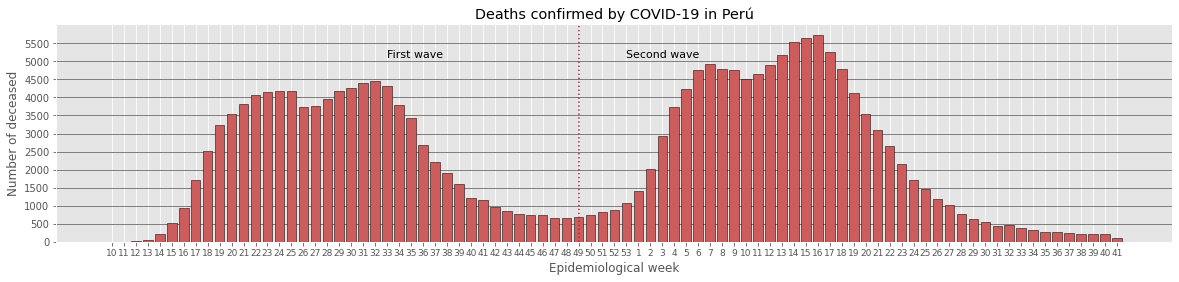

In [89]:
# Barplot of TOTAL DECEASED
def barplot_dec(df):

    # Create a figure
    plt.figure(figsize=(20, 4))

    # Using the style for the plot
    plt.style.use('ggplot')
    
    y_position = np.arange(len(df["epi_week"]))
    plt.bar(y_position, df["deceased"], color="indianred", edgecolor="black")  # Create bars
    plt.xticks(y_position, df["epi_week"])  # Create names on the x-axis
    plt.yticks(np.arange(0, 6000, 500))  # Range on y axis
    plt.title("Deaths confirmed by COVID-19 in Perú")
    plt.xlabel("Epidemiological week")
    plt.ylabel("Number of deceased")
    plt.tick_params(axis="x", labelsize=9)
    plt.axvline(x=39, color="brown", linestyle="dotted", linewidth=1.5)  # In week 49 start the new wave (01/12/2020)
    plt.text(23, 5100, r"First wave", fontsize=11)
    plt.text(43, 5100, r"Second wave", fontsize=11)
    plt.grid(True, axis="y", color="grey", linewidth="1", linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True
    plt.show()

barplot_dec(epi_df)

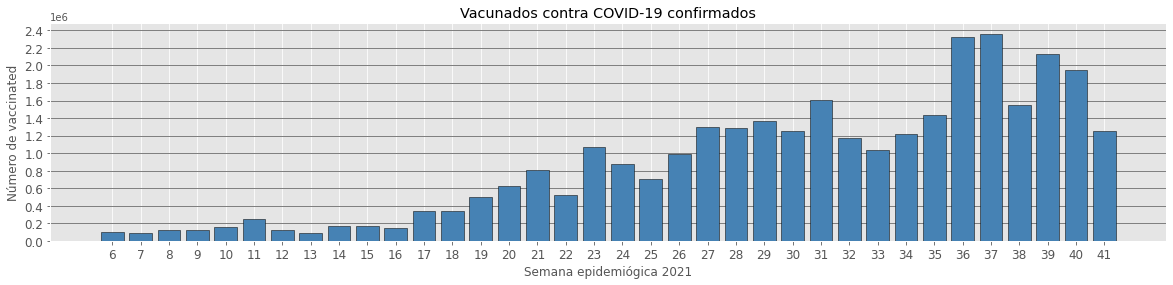

In [90]:
# Barplot of TOTAL VACCINATED
def barplot_vac(df):

    # Create a figure
    plt.figure(figsize=(20, 4))

    # Using the style for the plot
    plt.style.use('ggplot')

    y_position = np.arange(len(df["epi_week"].iloc[49:]))

    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=12)

    plt.bar(y_position, df["vaccinated"].iloc[49:], color="steelblue", edgecolor="black")  # Create bars
    plt.xticks(y_position, df["epi_week"].iloc[49:])  # Create names on the x-axis
    plt.yticks(np.arange(0, 2500000, 200000))
    
    plt.title("Vacunados contra COVID-19 confirmados")  # Labels
    plt.xlabel("Semana epidemiógica 2021", )
    plt.ylabel("Número de vaccinated")

    plt.grid(True, axis="y", color="grey", linewidth="1", linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.show()


barplot_vac(epi_df)

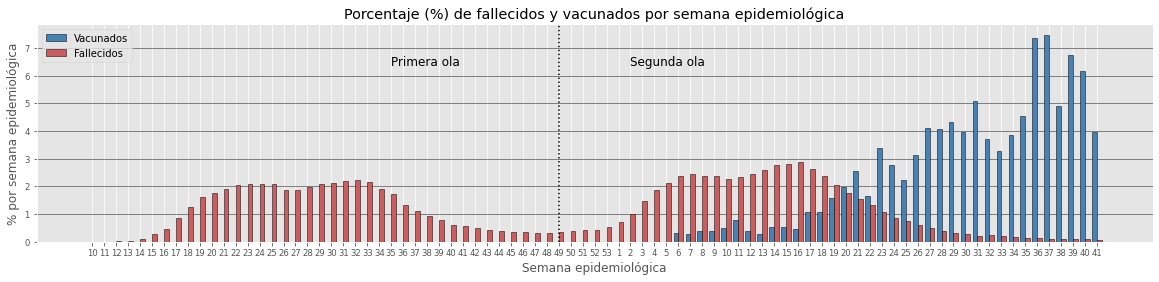

In [84]:

def barplot_epi(df):
       
       # Create a figure
       plt.figure(figsize=(20, 4))

       # Using the style for the plot
       plt.style.use('ggplot')

       x = np.arange(len(df['epi_week']))
       width = 0.40  # the width of the bars
       
       plt.bar(x - width/2, df['vaccinated_%'], width, label='Vacunados', color = 'steelblue', edgecolor='black')
       plt.bar(x + width/2, df['deceased_%'], width, label='Fallecidos', color = 'indianred', edgecolor='black')
       
       # Add some text for labels, title and custom x-axis tick labels, etc.
       plt.ylabel('% por semana epidemiológica')
       plt.xlabel('Semana epidemiológica')
       plt.title('Porcentaje (%) de fallecidos y vacunados por semana epidemiológica')
       plt.xticks(x, df["epi_week"])  # Create names on the x-axis

       plt.legend()
       plt.tick_params(axis='x', labelsize=8.5,)
       plt.tick_params(axis='y', labelsize=8.5,)

       plt.grid(True, axis = 'y', color = "grey", linewidth = "1", linestyle = "-")
       plt.rcParams['axes.axisbelow'] = True
       
       # Plot line (01/12/2020 week 49, 2nd wave)
       plt.axvline(x=39, color='black', linestyle='dotted', linewidth=1.5)

       # Plot text
       plt.text(25, 6.35, r'Primera ola', fontsize=12)
       plt.text(45, 6.35, r'Segunda ola', fontsize=12)

       # Plot
       plt.show()
       
       
barplot_epi(epi_df)

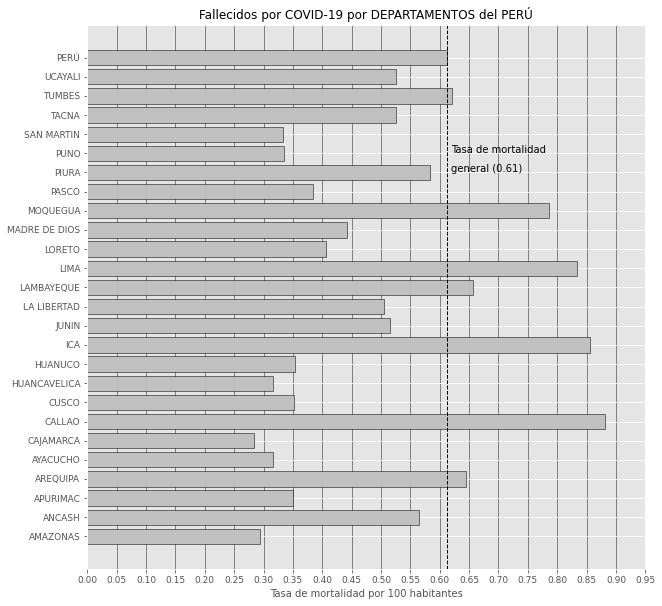

In [93]:

def barplot_dep(df):
     
    # Create a figure
    plt.figure(figsize=(10, 10))

    # Using the style for the plot
    plt.style.use('ggplot')

    # Create y positions
    y_pos = np.arange(len(df["DEPARTAMENTO"]))

    # Create bars
    bh = plt.barh(y_pos, df["tasa_mortalidad"], color="silver", edgecolor="black")

    # Create names on the x-axis
    plt.xticks(np.arange(0, 1, 0.05))
    plt.yticks(y_pos, df["DEPARTAMENTO"], fontsize=9)

    # Labels
    plt.title("Fallecidos por COVID-19 por DEPARTAMENTOS del PERÚ", fontsize=12)
    plt.xlabel("Tasa de mortalidad por 100 habitantes", fontsize=10)
    plt.tick_params(axis="x", labelsize=9)
    plt.text(0.62, 20, r"Tasa de mortalidad", fontsize=10)
    plt.text(0.62, 19, r"general (0.61)", fontsize=10)

    # 01/12/2020 en semana 49 empieza la segunda ola
    plt.axvline(x=0.6123714780640244, color="black", linestyle="dashed", linewidth=1)

    # Configure grid
    plt.grid(True, axis="x", color="grey", linewidth="1", linestyle="-")
    plt.rcParams["axes.axisbelow"] = True
    #bh[25].set_color("r")

    # Show graphic
    plt.show()

barplot_dep(dep_df)